<a href="https://colab.research.google.com/github/abhi-glitchhg/Intro-to-ml-dl/blob/main/Week3/KNNs_and_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
iris_df = sns.load_dataset("iris")

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# there are 3 labels setosa, versicolor, virginica and we have 4 features which describe the shape of the flower

In [ ]:
iris_df.species.value_counts() # alternative iris_df["species"].value_counts() or pd.value_counts(iris_df["species"]) 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# so the data is balanced 

In [ ]:
#any nan/ missing values? --> no 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


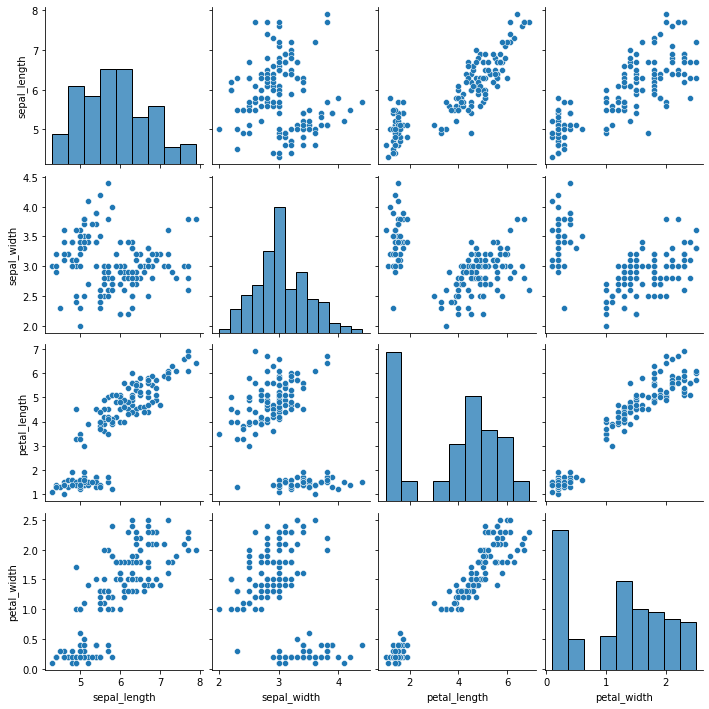

In [ ]:
sns.pairplot(iris_df)

In [ ]:
# okay but we can make this pairplot more informative by adding hue parameter . 

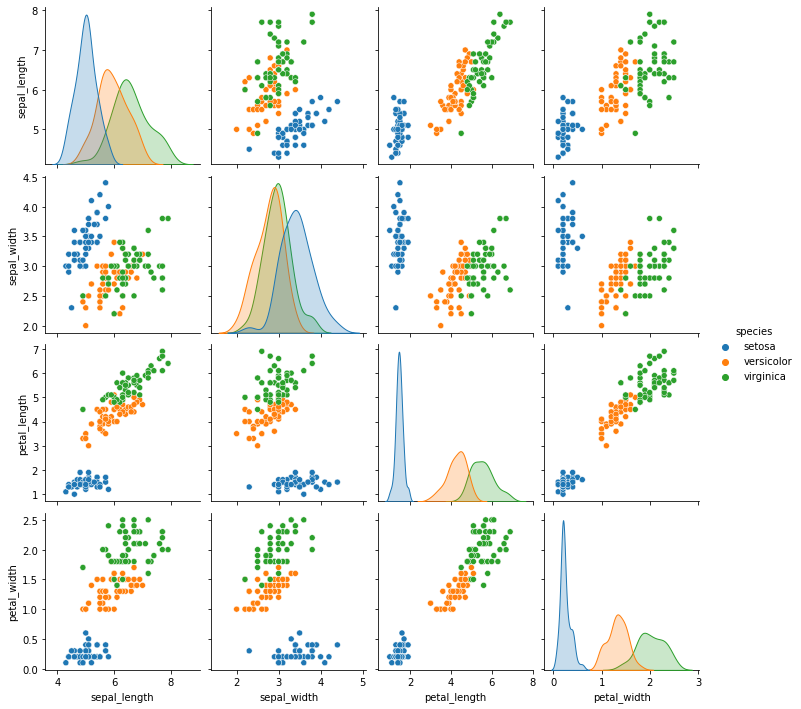

In [ ]:
sns.pairplot(iris_df, hue="species",)

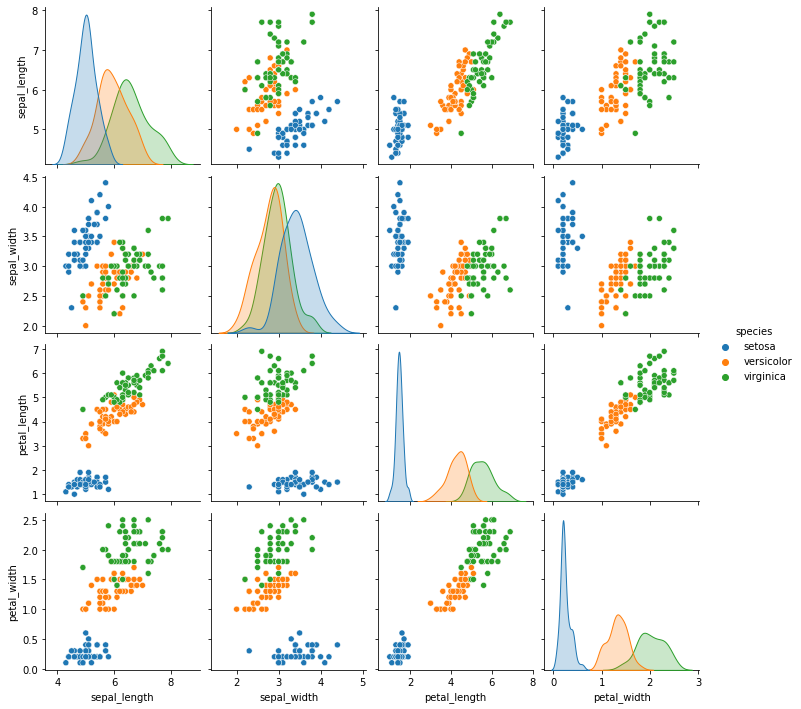

In [ ]:
sns.pairplot(iris_df, hue="species", kind = "scatter") #try kind = kde and reg

In [ ]:
#we can see here that the blue coloured datapoints have very different distribution than the orange and green coloured distribution.

#we can clearly identify the setosa if we are provided with the petal_length of the flower. (all the flowers with petal lenth less than 2.5 are of setosa.)

In [ ]:
#okay, but can we create some additional features from given datapoints? lets try, how about ratio of the sepal_length and width? 

In [ ]:
iris_df["sepal_ratio"] = iris_df["sepal_length"] / iris_df["sepal_width"]
iris_df["petal_ratio"] = iris_df["petal_length"] / iris_df["petal_width"]

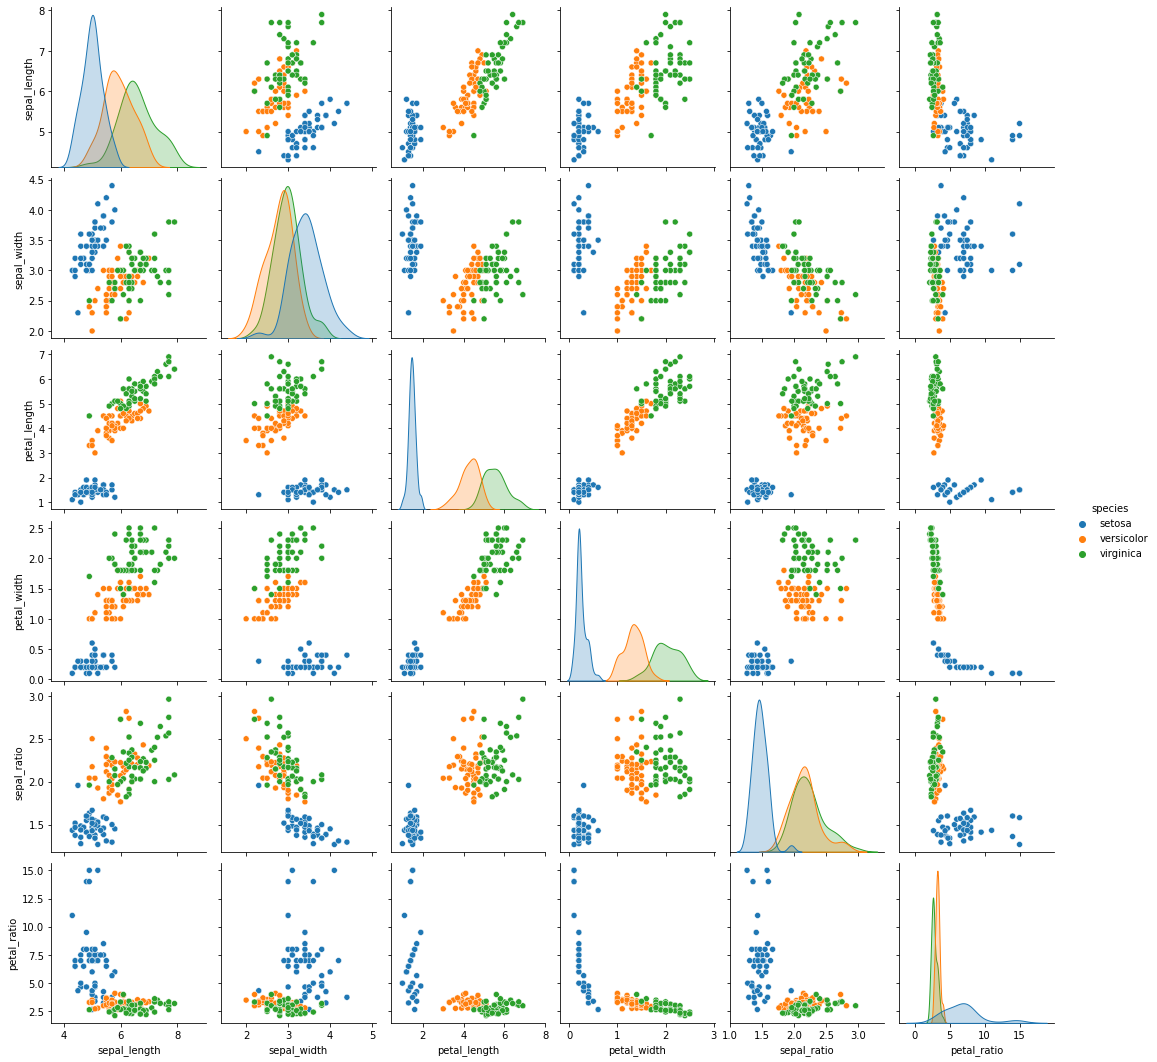

In [ ]:
sns.pairplot(iris_df, hue="species", ) # we can try for other such operations, maybe take ratio of lengths only , take difference of lenth, 



In [ ]:
iris_df["lenth_ratio"] = iris_df["sepal_length"] /iris_df["petal_length"] * 10
iris_df["width_ratio"] = iris_df["sepal_width"] / iris_df["petal_width"] * 10 
#iris_df.drop(["sepal_ratio", "petal_ratio"], axis=1, inplace=True)


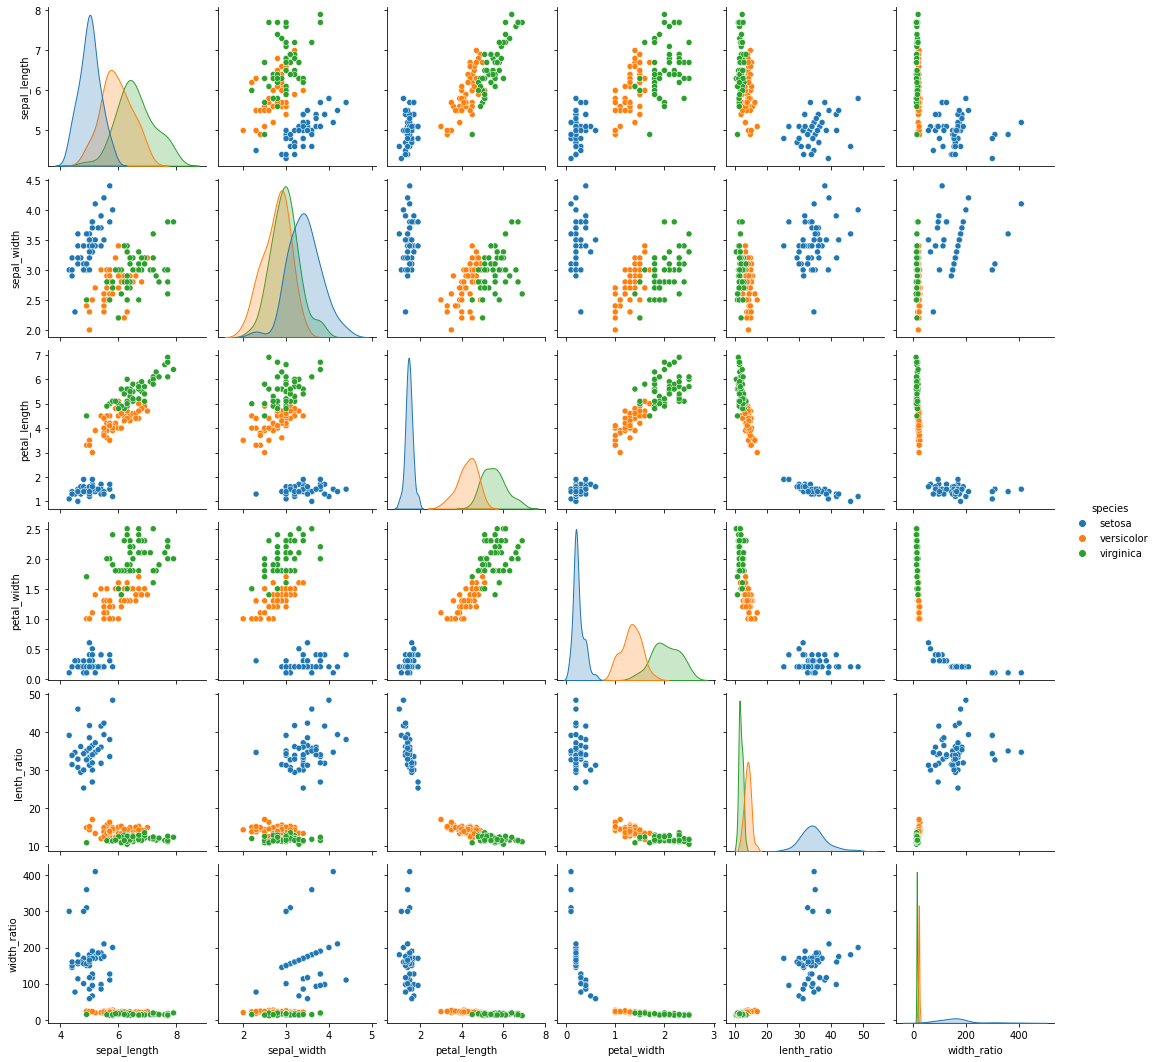

In [ ]:
sns.pairplot(iris_df, hue="species", ) # we can try for other such operations, maybe take ratio of lengths only , take difference of lenth, 


In [ ]:
iris_df[iris_df.species=='setosa']["petal_length"].max() 

1.9

In [ ]:
iris_df[iris_df.species == "versicolor"]["petal_length"].min()

3.0

In [ ]:
iris_df[iris_df.species == "virginica"]["petal_length"].min() 

4.5

In [ ]:
#so classifying if the given datapoint is of type `setosa` or not will be easier as do have prior knowledge about the distribution of the `setosa` class. 
#But the distribution of other two classes is very similar. lets just print pairplot of only these two classes. 


In [ ]:
iris_df.species != "setosa"

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [ ]:
iris_without_setosa = iris_df[iris_df.species != "setosa"]

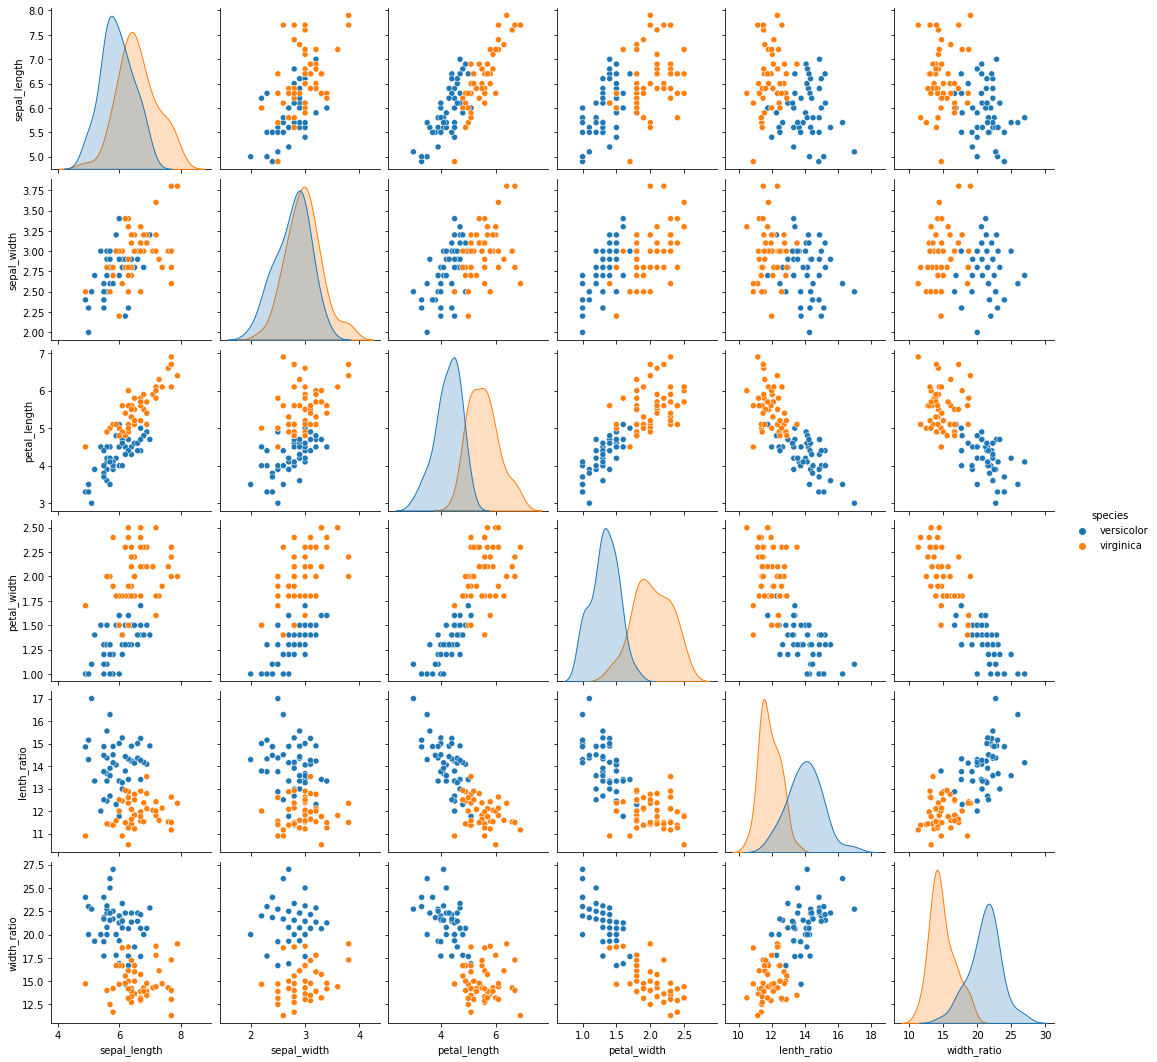

In [ ]:
sns.pairplot(iris_without_setosa, hue="species")

In [ ]:
from sklearn.model_selection import train_test_split 


X = iris_df.drop("species", axis=1)
y= iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 77)

In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width,lenth_ratio,width_ratio
82,5.8,2.7,3.9,1.2,14.871795,22.500000
133,6.3,2.8,5.1,1.5,12.352941,18.666667
113,5.7,2.5,5.0,2.0,11.400000,12.500000
93,5.0,2.3,3.3,1.0,15.151515,23.000000
5,5.4,3.9,1.7,0.4,31.764706,97.500000
114,5.8,2.8,5.1,2.4,11.372549,11.666667
128,6.4,2.8,5.6,2.1,11.428571,13.333333
119,6.0,2.2,5.0,1.5,12.000000,14.666667
33,5.5,4.2,1.4,0.2,39.285714,210.000000
94,5.6,2.7,4.2,1.3,13.333333,20.769231


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=1) #p=1 corresponds to city block distance; p=2 is normal euclidean distance
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [ ]:
knn.score(X_test,y_test)

0.9333333333333333

In [ ]:
results = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mtrx=confusion_matrix(results,y_test)
mtrx=pd.DataFrame(mtrx, index = "setosa versicolor virginica".split(), columns = "setosa versicolor virginica".split() )

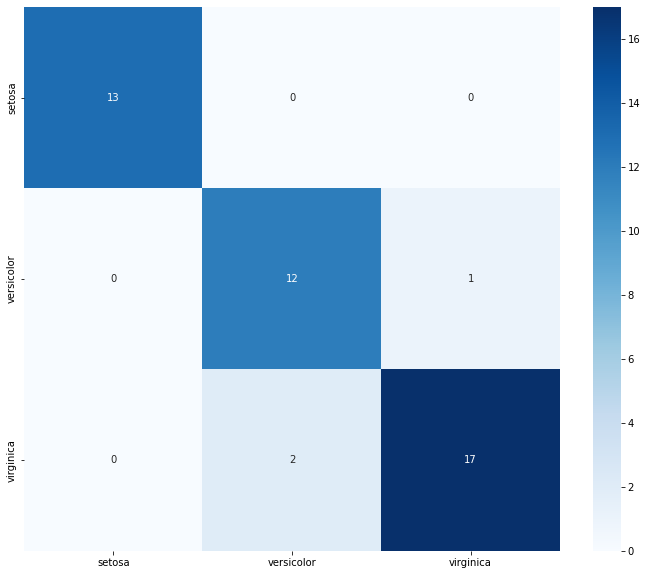

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(mtrx,cmap="Blues",annot=True,fmt="g", ) #this is a confusion matrix

In [ ]:
#yey 

In [ ]:
#HW - read about metrics like F1 score, precision, recall and how to calculate them using sklearn (refer documentation - https://scikit-learn.org/stable/index.html)

In [ ]:
# okay so we took n_neighbours = 5 and we got score of around 97%, but can we do better? we should search for best value of nearest_neghbours, right? lets do that only. 

In [ ]:
n_neighbours_list = list(range(1,25))
hyper_param_dict = {"n_neighbors" : n_neighbours_list, } # converting this to dict as GridSearchCV needs the search parameters in this form.
#you can have multiple hyper-parameters in this. For simplicity we are considering only one here.

In [ ]:
# we will be using grid search from sklearn library, read more about it here - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

In [ ]:
search_grid = GridSearchCV(knn, hyper_param_dict, cv=5, scoring='accuracy')

In [ ]:
search_grid.fit(iris_df.drop('species', axis=1), iris_df.species) # training split and testing split is taken care bt GridsearchCV

GridSearchCV(cv=5, estimator=KNeighborsClassifier(p=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [ ]:
search_grid.cv_results_

{'mean_fit_time': array([0.00334411, 0.00253468, 0.00225706, 0.00242786, 0.00229211,
        0.00240407, 0.00234685, 0.00255728, 0.00243182, 0.00254545,
        0.00216665, 0.00219569, 0.00212064, 0.00213447, 0.00215282,
        0.00218258, 0.00252819, 0.00254087, 0.00216022, 0.00208368,
        0.00227509, 0.00214295, 0.00294471, 0.00301671]),
 'mean_score_time': array([0.00401869, 0.00347528, 0.00331516, 0.00308852, 0.00321603,
        0.00330043, 0.00309954, 0.00331211, 0.00318255, 0.00328188,
        0.00293536, 0.00306659, 0.00293722, 0.00307231, 0.00300188,
        0.00310402, 0.00336576, 0.00339808, 0.00314116, 0.00297995,
        0.0034451 , 0.00313773, 0.00555234, 0.00525541]),
 'mean_test_score': array([0.96666667, 0.96666667, 0.96      , 0.96      , 0.96      ,
        0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
        0.96      , 0.95333333, 0.94666667, 0.95333333, 0.95333333,
        0.95333333, 0.96      , 0.96      , 0.96      , 0.96666667,
        0.966

In [ ]:
search_results = pd.DataFrame(search_grid.cv_results_)

In [ ]:
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003344,0.000935,0.004019,0.000945,1,{'n_neighbors': 1},1.0,0.966667,0.933333,0.966667,0.966667,0.966667,0.021082,1
1,0.002535,0.000316,0.003475,0.000459,2,{'n_neighbors': 2},1.0,0.966667,0.966667,0.933333,0.966667,0.966667,0.021082,1
2,0.002257,0.000101,0.003315,0.000222,3,{'n_neighbors': 3},1.0,0.966667,0.900000,0.933333,1.000000,0.960000,0.038873,12
3,0.002428,0.000223,0.003089,0.000134,4,{'n_neighbors': 4},1.0,0.966667,0.933333,0.900000,1.000000,0.960000,0.038873,6
4,0.002292,0.000056,0.003216,0.000226,5,{'n_neighbors': 5},1.0,0.966667,0.900000,0.933333,1.000000,0.960000,0.038873,12


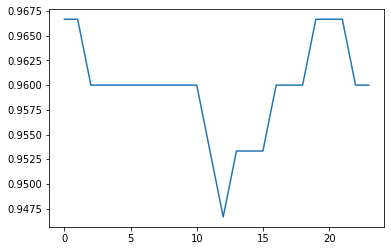

In [ ]:
plt.plot(search_results.mean_test_score)

In [ ]:
search_results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003344,0.000935,0.004019,0.000945,1,{'n_neighbors': 1},1.0,0.966667,0.933333,0.966667,0.966667,0.966667,0.021082,1
1,0.002535,0.000316,0.003475,0.000459,2,{'n_neighbors': 2},1.0,0.966667,0.966667,0.933333,0.966667,0.966667,0.021082,1
21,0.002143,0.000154,0.003138,0.000439,22,{'n_neighbors': 22},1.0,0.966667,0.966667,0.933333,0.966667,0.966667,0.021082,1
20,0.002275,0.000269,0.003445,0.000466,21,{'n_neighbors': 21},1.0,0.966667,0.966667,0.933333,0.966667,0.966667,0.021082,1
19,0.002084,0.000018,0.002980,0.000094,20,{'n_neighbors': 20},1.0,0.966667,0.966667,0.933333,0.966667,0.966667,0.021082,1
18,0.002160,0.000056,0.003141,0.000301,19,{'n_neighbors': 19},1.0,0.966667,0.933333,0.933333,0.966667,0.960000,0.024944,6
17,0.002541,0.000630,0.003398,0.000780,18,{'n_neighbors': 18},1.0,0.966667,0.933333,0.933333,0.966667,0.960000,0.024944,6
16,0.002528,0.000599,0.003366,0.000364,17,{'n_neighbors': 17},1.0,0.966667,0.933333,0.933333,0.966667,0.960000,0.024944,6
22,0.002945,0.000252,0.005552,0.000480,23,{'n_neighbors': 23},1.0,0.966667,0.933333,0.933333,0.966667,0.960000,0.024944,6
23,0.003017,0.000442,0.005255,0.000455,24,{'n_neighbors': 24},1.0,0.966667,0.933333,0.933333,0.966667,0.960000,0.024944,6


In [ ]:
#Descision tree

In [ ]:
!wget https://elf11.github.io/images/decisionTree.png

--2022-06-04 12:55:07--  https://elf11.github.io/images/decisionTree.png
Resolving elf11.github.io (elf11.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to elf11.github.io (elf11.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21795 (21K) [image/png]
Saving to: ‘decisionTree.png’

decisionTree.png    100%[===================>]  21.28K  --.-KB/s    in 0.001s  

2022-06-04 12:55:07 (15.2 MB/s) - ‘decisionTree.png’ saved [21795/21795]



In [ ]:
!wget https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv


--2022-06-04 11:09:15--  https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419 [text/plain]
Saving to: ‘PlayTennis.csv’

PlayTennis.csv      100%[===================>]     419  --.-KB/s    in 0s      

2022-06-04 11:09:15 (8.51 MB/s) - ‘PlayTennis.csv’ saved [419/419]



In [ ]:
playtennis_df = pd.read_csv("PlayTennis.csv")

In [ ]:
playtennis_df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df1 = playtennis_df[["Outlook","Play Tennis"]]
df1 

,Outlook,Play Tennis
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rain,Yes
4,Rain,Yes
5,Rain,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rain,Yes


In [ ]:
df2 = playtennis_df[["Temperature","Play Tennis"]]
df2

,Temperature,Play Tennis
0,Hot,No
1,Hot,No
2,Hot,Yes
3,Mild,Yes
4,Cool,Yes
5,Cool,No
6,Cool,Yes
7,Mild,No
8,Cool,Yes
9,Mild,Yes


In [ ]:
df1 



""""
Weather is sunny or not

sunny and playing          2
sunny and not playing      3 

gini for sunny  = 1 - (2/5)**2 - (3/5)**2 = 0.48

not sunny and playing       7
not sunny and not playing   2

gini for not sunnny = 0.38
overall gini for sunny Condition will be weighted average of above two = 5/14 * 0.48 + 9/14 *0.38 = 0.415
-----------------------------------------------------------

Overcast and Playing     4
Overcast and Not Playing 0

Gini = 1-(4/4)**2 =0

Not Overcast and playing  3
Not Overcast Not Playing  7
Gini = 1 - (3/10)**2 - (7/10)**2 = 0.42

Overall Gini for Overcast Condition = 10/14 * 0.42 = 0.30

-----------------------------------------------------------

Rain and playing      3
Rain and not Playing  1

Gini for Raining - 1 - (3/4)**2 -(1/4)**2 = 0.375

Not Raining and Playing      6
Not Raining and Not playing  4

Gini for Not Raining -  1 - (6/10)**2 - (4/10)**2 = 0.48

Total Overall = 4/14 * 0.375 + 10/14 * 0.48 = 0.45


As Overcast Condition has minimum Gini; this condition will be considered further. 

"""



'"\nWeather is sunny or not\n\nsunny and playing          2\nsunny and not playing      3 \n\ngini for sunny  = 1 - (2/5)**2 - (3/5)**2 = 0.48\n\nnot sunny and playing       7\nnot sunny and not playing   2\n\ngini for not sunnny = 0.38\noverall gini for sunny Condition will be weighted average of above two = 5/14 * 0.48 + 9/14 *0.38 = 0.415\n-----------------------------------------------------------\n\nOvercast and Playing     4\nOvercast and Not Playing 0\n\nGini = 1-(4/4)**2 =0\n\nNot Overcast and playing  3\nNot Overcast Not Playing  7\nGini = 1 - (3/10)**2 - (7/10)**2 = 0.42\n\nOverall Gini for Overcast Condition = 10/14 * 0.42 = 0.30\n\n-----------------------------------------------------------\n\nRain and playing      3\nRain and not Playing  1\n\nGini for Raining - 1 - (3/4)**2 -(1/4)**2 = 0.375\n\nNot Raining and Playing      6\nNot Raining and Not playing  4\n\nGini for Not Raining -  1 - (6/10)**2 - (4/10)**2 = 0.48\n\nTotal Overall = 4/14 * 0.375 + 10/14 * 0.48 = 0.45\n\n

In [ ]:
df2 

"""
Hot and Playing       2 data points
Hot and Not Playing   2 data points

gini for hot = 1 - (0.5)**2 - (0.5)**2 = 0.5

Not hot and playing      5
Not hot and Not playing  5

gini for Not Hot = 1 - (1/4)**2 -(3/4)**2 = 0.37

overall gini impurity will be weighted average of above all = 4/14 * 0.5 + 10/14*0.5 = 0.5


and so on...


The condition which has minimum Gini will be considered for further comparison.

we do same Procedure for other columns as well and the column which has the condition with minimum Gini will be considered first and accordingly Split will be made,
 and We will shift the node and will do same procedure again(calculating Gini Impurities.).

"""



'\nHot and Playing       2 data points\nHot and Not Playing   2 data points\n\ngini for hot = 1 - (0.5)**2 - (0.5)**2 = 0.5\n\nNot hot and playing      5\nNot hot and Not playing  5\n\ngini for Not Hot = 1 - (1/4)**2 -(3/4)**2 = 0.37\n\noverall gini impurity will be weighted average of above all = 4/14 * 0.5 + 10/14*0.5 = 0.5\n\n\nOvercast and Playing     4\nOvercast and Not Playing 0\n\nGini = 1-(4/4)**2 =0\n\nNot Overcast and playing =0\nNot Overcast Not Playing =0\n\n\n\n'

In [ ]:
#but there is disadvantage of using discision trees; they eassily overfit the data and cant be generalised, hence we either have to prune the trees or we have to use the random forests method.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=100)
model = dtmodel.fit(X_train, y_train)

In [ ]:
dtmodel.score(X_test, y_test)

0.8666666666666667